# 시각화

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import koreanize_matplotlib

# 데이터 불러오기

In [11]:
data = pd.read_csv("data/customer_example.csv")
print(data.head())
print(data.info())

   customer_id purchase_date membership_tier  total_purchase  item_count
0            1    2023-01-07        Platinum             872           7
1            2    2023-01-04        Platinum             589          13
2            3    2023-01-08            Gold             330          15
3            4    2023-01-05          Silver             140          11
4            5    2023-01-07            Gold             127           4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customer_id      50 non-null     int64 
 1   purchase_date    50 non-null     object
 2   membership_tier  50 non-null     object
 3   total_purchase   50 non-null     int64 
 4   item_count       50 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None


In [10]:
data = pd.read_csv("data/customer_example.csv", parse_dates=["purchase_date"])
print(data.head())
print(data.info())

   customer_id purchase_date membership_tier  total_purchase  item_count
0            1    2023-01-07        Platinum             872           7
1            2    2023-01-04        Platinum             589          13
2            3    2023-01-08            Gold             330          15
3            4    2023-01-05          Silver             140          11
4            5    2023-01-07            Gold             127           4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      50 non-null     int64         
 1   purchase_date    50 non-null     datetime64[ns]
 2   membership_tier  50 non-null     object        
 3   total_purchase   50 non-null     int64         
 4   item_count       50 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.1+ KB
None


# 1. 범주형 데이터

In [13]:
data.head()

,customer_id,purchase_date,membership_tier,total_purchase,item_count
0,1,2023-01-07,Platinum,872,7
1,2,2023-01-04,Platinum,589,13
2,3,2023-01-08,Gold,330,15
3,4,2023-01-05,Silver,140,11
4,5,2023-01-07,Gold,127,4


membership_tier
Gold        18
Silver      17
Platinum    15
Name: count, dtype: int64


<Axes: xlabel='membership_tier'>

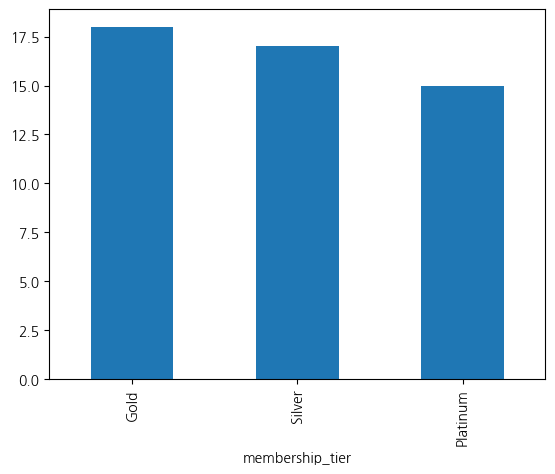

In [16]:
# 멤버십별 고객 수
print(data["membership_tier"].value_counts())
data["membership_tier"].value_counts().plot(kind="bar")



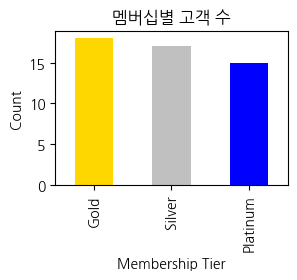

In [18]:
# 범주형 데이터 시각화
tier_counts = data["membership_tier"].value_counts()
tier_counts.plot(kind="bar", color=["gold", "silver", "blue"], title="멤버십별 고객 수", figsize=(3,2))
# plt.xticks(rotation=0)
plt.xlabel("Membership Tier")
plt.ylabel("Count")
plt.show()


<Axes: title={'center': '멤버십별 고객 수'}, xlabel='membership_tier'>

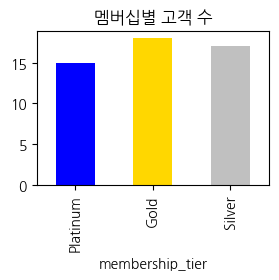

In [22]:
new_tier_counts = data["membership_tier"].value_counts().loc[["Platinum", "Gold", "Silver"]]
new_tier_counts.plot(kind="bar", color=["blue", "gold", "silver"], title="멤버십별 고객 수", figsize=(3,2))

# 2. 연속형 데이터

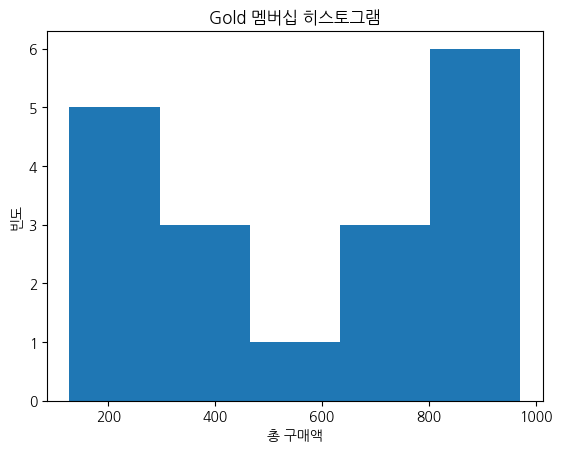

In [117]:
data.loc[data["membership_tier"]=="Gold","total_purchase"].plot(kind="hist", bins=5)
plt.title("Gold 멤버십 히스토그램")
plt.xlabel("총 구매액")
plt.ylabel("빈도")
plt.show()

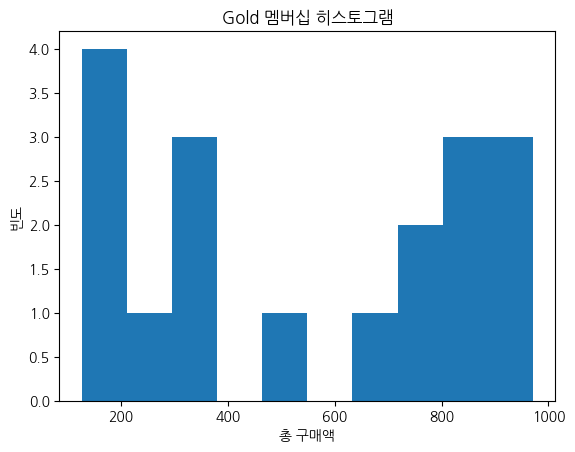

In [23]:
data.loc[data["membership_tier"]=="Gold","total_purchase"].plot(kind="hist", bins=10)
plt.title("Gold 멤버십 히스토그램")
plt.xlabel("총 구매액")
plt.ylabel("빈도")
plt.show()

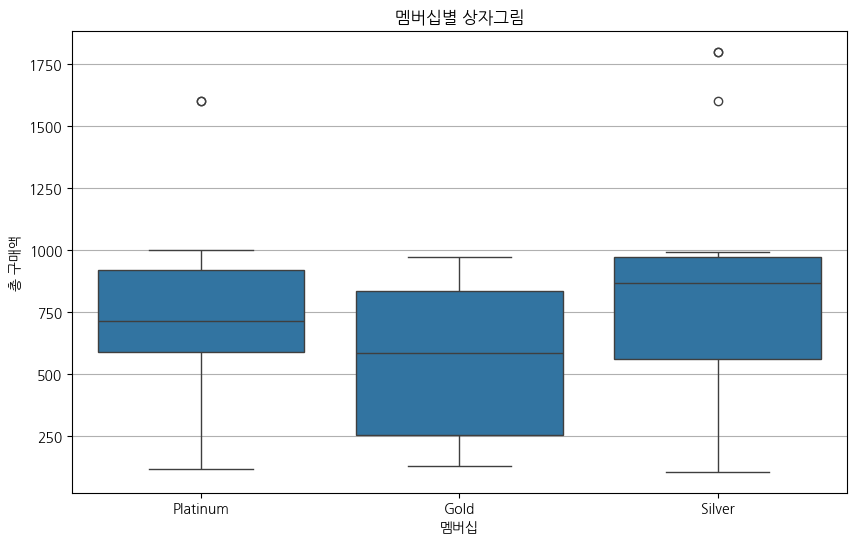

In [118]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="membership_tier", y="total_purchase")
plt.title("멤버십별 상자그림")
plt.xlabel("멤버십")
plt.ylabel("총 구매액")
plt.grid(axis="y")
plt.show()


In [26]:
# 날짜별로 구매 금액을 합산하여 나타내기
data.groupby("purchase_date")["total_purchase"].sum()

purchase_date
2023-01-01    1706
2023-01-02    2883
2023-01-03    2752
2023-01-04    4201
2023-01-05    3493
2023-01-06    2359
2023-01-07    5099
2023-01-08    5976
2023-01-09    4838
2023-01-10    2353
Name: total_purchase, dtype: int64

# 3. 시계열 데이터

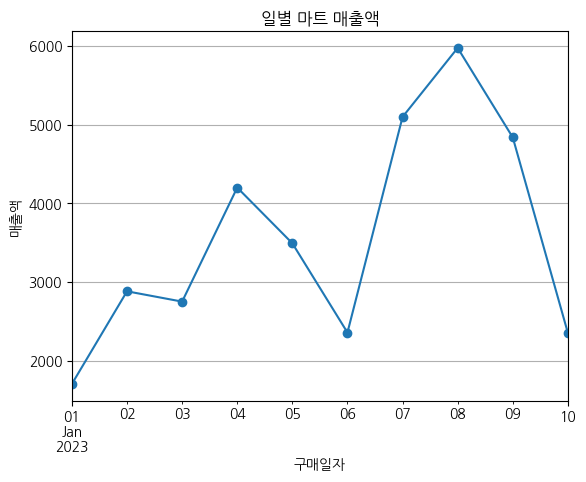

In [119]:
# 날짜별 구매 횟수 합계
daily_purchase = data.groupby("purchase_date")["total_purchase"].agg(func="sum")
daily_purchase.plot(marker='o')
plt.title("일별 마트 매출액")
plt.xlabel("구매일자")
plt.ylabel("매출액")
plt.grid()
plt.show()